In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from TCBC_tools import Structure, MachineLearning as ml
from pprint import pprint
from scipy import stats

/home/tenojo/miniconda3/envs/Test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
BASE_COVOC_FOLDER = "TestResults/FinalCOVOC/"
BASE_COVOC_HPFV_END = "_hpfv.json"

In [3]:
test_conllu_line = "1\tAikojen\taika\tNOUN\tN\tCase=Gen|Number=Plur\t2\tnsubj\t_\t_\n2\tkuluessa\tkulua\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n3\tmuinaisina\tmuinainen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t4\tamod\t_\t_\n4\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t5\tobl\t_\t_\n5\tsyntynyt\tsynty\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tpahuus\tpahuus\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t7\tnsubj\t_\t_\n7\tkasvaa\tkasvaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\ti\u00e4inen\ti\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t10\tamod\t_\t_\n10\tpimeys\tpimeys\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t12\tnsubj:cop\t_\t_\n11\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n12\tvalloillaan\tvalloillaan\tADV\tAdv\t_\t7\tconj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tyritt\u00e4\u00e4\tyritt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\tconj\t_\t_\n15\tsy\u00f6st\u00e4\tsy\u00f6st\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t14\txcomp\t_\t_\n16\tkoko\tkoko\tADJ\tA\t_\t17\tamod\t_\t_\n17\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t15\tobj\t_\t_\n18\tp\u00e4\u00e4ttym\u00e4tt\u00f6m\u00e4\u00e4n\tp\u00e4\u00e4ttym\u00e4t\u00f6n\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Ton|Number=Sing\t19\tamod\t_\t_\n19\ty\u00f6h\u00f6n\ty\u00f6\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tT\u00e4t\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Dem\t2\tdet\t_\t_\n2\tpahuutta\tpahuutta\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t5\tobj\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n4\tvoi\tvoida\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t5\taux\t_\t_\n5\tly\u00f6d\u00e4\tly\u00f6d\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n6\tkukaan\tkukaan\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t5\tnsubj\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n8\tpaitsi\tpaitsi\tADP\tAdp\t_\t18\tcase\t_\t_\n9\tyksi\tyksi\tNUM\tNum\tCase=Nom|Number=Sing|NumType=Card\t18\tnummod\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tainoa\tainoa\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tconj\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t13\tnsubj\t_\t_\n13\tvalitsema\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Agt|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t17\tnsubj\t_\t_\n16\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t15\tflat:name\t_\t_\n17\ttuleva\ttulla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tsankari\tsankari\tNOUN\tN\tCase=Nom|Number=Sing\t6\tappos\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tVirheet\u00f6n\tvirheet\u00f6n\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Ton|Number=Sing\t2\tamod\t_\t_\n2\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t5\tnsubj\t_\t_\n5\tkantaa\tkantaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tacl:relcl\t_\t_\n6\tvalon\tvalo\tNOUN\tN\tCase=Gen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tamulettia\tamuletti\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n9\tt\u00e4ydellisesti\tt\u00e4ydellisesti\tADV\tAdv\tDerivation=Sti\t10\tadvmod\t_\t_\n10\tt\u00e4ytt\u00e4\u00e4\tt\u00e4ytt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n11\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t12\tnmod:poss\t_\t_\n12\ttahdon\ttahto\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKun\tkun\tSCONJ\tC\t_\t4\tmark\t_\t_\n2\taika\taika\tNOUN\tN\tCase=Nom|Number=Sing\t4\tnsubj:cop\t_\t_\n3\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n4\tt\u00e4ysi\tt\u00e4ysi\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t7\tadvcl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t7\tnsubj\t_\t_\n7\tuhraa\tuhrata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t7\tobj\t_\t_\n9\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t7\tobl\t_\t_\n10\tpuolesta\tpuolesta\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t7\tobl\t_\t_\n12\tpimeytt\u00e4\tpimeys\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t11\tnmod\t_\t_\n13\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\tmutta\tmutta\tCCONJ\tC\t_\t18\tcc\t_\t_\n16\tkuolemakaan\tkuolema\tNOUN\tN\tCase=Nom|Clitic=Kaan|Number=Sing\t18\tnsubj\t_\t_\n17\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t18\taux\t_\t_\n18\tsaa\tsaada\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t7\tconj\t_\t_\n19\th\u00e4nest\u00e4\th\u00e4n\tPRON\tPron\tCase=Ela|Number=Sing|Person=3|PronType=Prs\t18\tobl\t_\t_\n20\tvoittoa\tvoitto\tNOUN\tN\tCase=Par|Number=Sing\t18\tobj\t_\t_\n21\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tValittu\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t2\tnsubj\t_\t_\n2\tvoittaa\tvoittaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tlopullisesti\tlopullisesti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\tjoukkoineen\tjoukko\tNOUN\tN\tCase=Com|Person[psor]=3\t4\tnmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tmaailmaan\tmaailma\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n9\tpalaa\tpalata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\thyvyys\thyvyys\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n11\tja\tja\tCCONJ\tC\t_\t12\tcc\t_\t_\n12\trauha\trauha\tNOUN\tN\tCase=Nom|Number=Sing\t10\tconj\t_\t_\n13\tkuin\tkuin\tSCONJ\tC\t_\t15\tmark\t_\t_\n14\tentisin\u00e4\tentinen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t15\tamod\t_\t_\n15\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t9\tadvcl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n4\tjotka\tjoka\tPRON\tPron\tCase=Nom|Number=Plur|PronType=Rel\t7\tnsubj\t_\t_\n5\tovat\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n6\tvalittua\tvalittu\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n7\tseuranneet\tseurata\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t2\tacl:relcl\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n9\tp\u00e4\u00e4sev\u00e4t\tp\u00e4\u00e4st\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n10\th\u00e4nen\th\u00e4n\tPRON\tPron\tCase=Gen|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n11\tkanssaan\tkanssa\tADP\tAdp\tAdpType=Post|Person[psor]=3\t10\tcase\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t9\tobl\t_\t_\n13\tluo\tluo\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tikuiseen\tikuinen\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Inen|Number=Sing\t15\tamod\t_\t_\n15\tiloon\tilo\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tJoten\tjoten\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tryhdy\tryhty\u00e4\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsin\u00e4kin\tsin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=2|PronType=Prs\t3\tnsubj\t_\t_\n5\tvalittu-ehdokkaaksi\tvalittu#ehdokas\tNOUN\tN\tCase=Tra|Number=Sing\t3\txcomp:ds\t_\t_\n6\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJos\tjos\tSCONJ\tC\t_\t3\tmark\t_\t_\n2\tet\tei\tAUX\tV\tNumber=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkuole\tkuolla\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t9\tadvcl\t_\t_\n4\theti\theti\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tensimm\u00e4isess\u00e4\tensimm\u00e4inen\tADJ\tNum\tCase=Ine|Derivation=Inen|Number=Sing|NumType=Ord\t6\tamod\t_\t_\n6\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t3\tobl\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\tsaatat\tsaattaa\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n9\tvoittaa\tvoittaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n10\tikuisen\tikuinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tel\u00e4m\u00e4n\tel\u00e4m\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t9\tobj\t_\t_\n12\t!\t!\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n2\tEnt\u00e4\tent\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tjos\tjos\tSCONJ\tC\t_\t5\tmark\t_\t_\n4\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n5\thalua\thaluta\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n8\tmin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t9\tnsubj\t_\t_\n9\tkysyin\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t5\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\t\u00c4l\u00e4\tei\tAUX\tV\tMood=Imp|Number=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n4\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n5\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n7\tjyr\u00e4htiv\u00e4t\tjyr\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n8\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t7\tnsubj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tOnko\tolla\tAUX\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tmeiss\u00e4\tmin\u00e4\tPRON\tPron\tCase=Ine|Number=Plur|PronType=Dem\t4\tobl\t_\t_\n4\tkeness\u00e4k\u00e4\u00e4n\tkukaan\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t0\troot\t_\t_\n5\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tnsubj:cop\t_\t_\n6\tpelastamisen\tpelastaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tarvoista\tarvoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t5\tnmod\t_\t_\n8\t?\t?\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSiet\u00e4isimme\tsiet\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Plur|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t1\tobj\t_\t_\n3\tkuolla\tkuolla\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t1\txcomp\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tparataxis\t_\t_\n7\tViikatemies\tviikate#mies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tParas\thyv\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t0\troot\t_\t_\n3\titse\titse\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t5\tobj\t_\t_\n5\tpelastaa\tpelastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp:ds\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\ttokaisi\ttokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tTe\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=2|PronType=Prs\t3\tnsubj:cop\t_\t_\n3\tharhaoppiset\tharhaoppinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Plur\t0\troot\t_\t_\n4\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tHirteen\thirre\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n2\tjoudatte\tjoudattaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t!\t!\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n5\tpauhasivat\tpauhata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t3\tnsubj\t_\t_\n2\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tuskaltanut\tuskaltaa\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tmainitakaan\tmainita\tVERB\tV\tClitic=Kaan|InfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\txcomp\t_\t_\n5\tmuista\tmuu\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t6\tdet\t_\t_\n6\tmahdollisuuksista\tmahdollisuus\tNOUN\tN\tCase=Ela|Derivation=Llinen,Vs|Number=Plur\t4\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tniin\tniin\tADV\tAdv\t_\t9\tadvmod\t_\t_\n9\tlopetin\tlopettaa\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n10\tt\u00e4m\u00e4n\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t11\tdet\t_\t_\n11\tpaperin\tpaperi\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\ttuhlaamisen\ttuhlaaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t9\tobj\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n14\tkoska\tkoska\tSCONJ\tC\t_\t16\tmark\t_\t_\n15\ttila\ttila\tNOUN\tN\tCase=Nom|Number=Sing\t16\tnsubj\t_\t_\n16\tloppuu\tloppua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tadvcl\t_\t_\n17\tja\tja\tCCONJ\tC\t_\t21\tcc\t_\t_\n18\tminun\tmin\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|Person=1|PronType=Prs\t21\tnsubj\t_\t_\n19\tpit\u00e4isi\tpit\u00e4\u00e4\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t21\taux\t_\t_\n20\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t21\taux\t_\t_\n21\ttekem\u00e4ss\u00e4\ttehd\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t16\tconj\t_\t_\n22\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t24\tdet\t_\t_\n23\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t24\tadvmod\t_\t_\n24\thy\u00f6dyllist\u00e4\thy\u00f6dyllinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t21\tobj\t_\t_\n25\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsyv\u00e4\u00e4n\tsyv\u00e4\u00e4n\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tkyn\u00e4n\tkyn\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\tmustepulloon\tmuste#pullo\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t9\txcomp\t_\t_\n11\thorisonttiin\thorisontti\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tPahuksen\tpahus\tNOUN\tN\tCase=Gen|Number=Sing\t3\tnmod:poss\t_\t_\n3\tprofetia\tprofetia\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLinnan\tlinna\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkorkeimmasta\tkorkea\tADJ\tA\tCase=Ela|Degree=Sup|Number=Sing\t3\tamod\t_\t_\n3\ttornista\ttorni\tNOUN\tN\tCase=Ela|Number=Sing\t4\tobl\t_\t_\n4\tn\u00e4ki\tn\u00e4hd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=0|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tymp\u00e4r\u00f6iv\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tkaupungin\tkaupunki\tNOUN\tN\tCase=Gen|Number=Sing\t11\tnmod\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tpeltomaiden\tpelto#maa\tNOUN\tN\tCase=Gen|Number=Plur\t6\tconj\t_\t_\n9\tyli\tyli\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n10\tautioon\tautio\tADJ\tA\tCase=Ill|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\treunaseutuun\treuna#seutu\tNOUN\tN\tCase=Ill|Number=Sing\t4\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t15\tpunct\t_\t_\n13\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t15\tnsubj\t_\t_\n14\tv\u00e4hitellen\tv\u00e4hitellen\tADV\tAdv\t_\t15\tadvmod\t_\t_\n15\tnousi\tnousta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tacl:relcl\t_\t_\n16\tsynkkyytt\u00e4\tsynkkyys\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\thuokuvaksi\thuokua\tVERB\tV\tCase=Tra|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tvuoristoksi\tvuoristo\tNOUN\tN\tCase=Tra|Number=Sing\t15\txcomp\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsiirtyi\tsiirty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvieress\u00e4\u00e4n\tvieress\u00e4\tADV\tAdv\tPerson[psor]=3\t4\tadvmod\t_\t_\n4\tolevan\tolla\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n5\tjyhke\u00e4n\tjyhke\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tkaukoputken\tkauko#putki\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobl\t_\t_\n7\t\u00e4\u00e4relle\t\u00e4\u00e4ri\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t9\tobl\t_\t_\n11\ttaas\ttaas\tADV\tAdv\t_\t9\tadvmod\t_\t_\n12\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t14\tobl\t_\t_\n13\tv\u00e4liin\tv\u00e4liin\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tj\u00e4\u00e4v\u00e4\u00e4n\tj\u00e4\u00e4d\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t15\tacl\t_\t_\n15\tsolaan\tsola\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n17\tmiss\u00e4\tmik\u00e4\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Rel\t18\tobl\t_\t_\n18\tkulki\tkulkea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t15\tacl:relcl\t_\t_\n19\tvaltakunnat\tvalta#kunta\tNOUN\tN\tCase=Nom|Number=Plur\t20\tobj\t_\t_\n20\tyhdist\u00e4v\u00e4\tyhdist\u00e4\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t21\tacl\t_\t_\n21\tvaltatie\tvalta#tie\tNOUN\tN\tCase=Nom|Number=Sing\t18\tnsubj\t_\t_\n22\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tTaistelu\ttaistelu\tNOUN\tN\tCase=Nom|Derivation=U|Number=Sing\t6\tnsubj:cop\t_\t_\n2\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n4\tedelleen\tedelleen\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tt\u00e4ydess\u00e4\tt\u00e4ysi\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tvauhdissa\tvauhti\tNOUN\tN\tCase=Ine|Number=Sing\t0\troot\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tOn\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n3\ttuokin\ttuokin\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t6\tnsubj:cop\t_\t_\n4\ttaas\ttaas\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tj\u00e4rkev\u00e4\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\ttapa\ttapa\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n7\tkuluttaa\tkuluttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tacl\t_\t_\n8\taikaa\taika\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tresursseja\tresurssi\tNOUN\tN\tCase=Par|Number=Plur\t8\tconj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tLuulisi\tluulla\tVERB\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n3\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t8\tmark\t_\t_\n4\tnelj\u00e4ss\u00e4\tnelj\u00e4\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t5\tcompound\t_\t_\n5\tsadassa\tsata\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t6\tnummod\t_\t_\n6\tvuodessa\tvuosi\tNOUN\tN\tCase=Ine|Number=Sing\t8\tobl\t_\t_\n7\tihminen\tihminen\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\tkeksisi\tkeksi\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t1\tccomp\t_\t_\n9\tj\u00e4rkev\u00e4\u00e4kin\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Clitic=Kin|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n10\ttekemist\u00e4\ttekeminen\tNOUN\tN\tCase=Par|Derivation=Minen|Number=Sing\t8\tobj\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t17\tpunct\t_\t_\n12\tmutta\tmutta\tCCONJ\tC\t_\t17\tcc\t_\t_\n13\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t17\taux\t_\t_\n14\tn\u00e4ht\u00e4v\u00e4sti\tn\u00e4hd\u00e4\tVERB\tV\tDerivation=Sti\t17\tadvmod\t_\t_\n15\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n16\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t17\tnsubj\t_\t_\n17\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n18\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n19\thitusen\thitusen\tADV\tAdv\t_\t17\tadvmod\t_\t_\n20\t,\t,\tPUNCT\tPunct\t_\t23\tpunct\t_\t_\n21\tjotta\tjotta\tSCONJ\tC\t_\t23\tmark\t_\t_\n22\tn\u00e4kyviin\tn\u00e4ky\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Plur|PartForm=Pres|VerbForm=Part|Voice=Act\t23\txcomp\t_\t_\n23\ttuli\ttulla\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t17\tadvcl\t_\t_\n24\tvuorenrinteell\u00e4\tvuoren#rinne\tNOUN\tN\tCase=Ade|Number=Sing\t25\tobl\t_\t_\n25\tseisoskeleva\tseisoskella\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t26\tacl\t_\t_\n26\thahmo\thahmo\tNOUN\tN\tCase=Nom|Number=Sing\t23\tnsubj\t_\t_\n27\tmustassa\tmusta\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t28\tamod\t_\t_\n28\thaarniskassa\thaarniska\tNOUN\tN\tCase=Ine|Number=Sing\t26\tnmod\t_\t_\n29\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tPatsastelet\tpatsastella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\tlatelet\tladella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tmahtipontisia\tmahtipontinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t7\tamod\t_\t_\n7\tsolvauksia\tsolvaus\tNOUN\tN\tCase=Par|Number=Plur\t5\tobj\t_\t_\n8\tep\u00e4k\u00e4yt\u00e4nn\u00f6llisten\tep\u00e4#k\u00e4yt\u00e4nn\u00f6llinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Plur\t9\tamod\t_\t_\n9\tpiikkikoristeidesi\tpiikki#koriste\tNOUN\tN\tCase=Gen|Number=Plur|Number[psor]=Sing|Person[psor]=1\t5\tobl\t_\t_\n10\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMuuttuisit\tmuuttua\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tjo\tjo\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\tlohik\u00e4\u00e4rmeeksi\tlohi#k\u00e4\u00e4rme\tNOUN\tN\tCase=Tra|Number=Sing\t1\txcomp\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttyhjent\u00e4isit\ttyhjent\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n6\tkoko\tkoko\tADJ\tA\t_\t7\tamod\t_\t_\n7\ttantereen\ttantere\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTai\ttai\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\taivopesisit\taivopesita\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvastustajat\tvastustaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Plur\t2\tobj\t_\t_\n4\ttai\ttai\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttekisit\ttehd\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t5\tobj\t_\t_\n7\tkaikilla\tkaikki\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Ind\t8\tdet\t_\t_\n8\tylivoimillasi\tyli#voima\tADJ\tA\tCase=Ade|Number=Plur|Number[psor]=Sing|Person[psor]=2\t5\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMutta\tmutta\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\tleikki\u00e4h\u00e4n\tleikki\tNOUN\tN\tCase=Nom|Clitic=Han|Number=Sing\t0\troot\t_\t_\n3\tt\u00e4m\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t2\tnsubj:cop\t_\t_\n4\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t2\tdet\t_\t_\n5\tsinulle\tsin\u00e4\tPRON\tPron\tCase=All|Number=Sing|Person=2|PronType=Prs\t2\tobl\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tcop\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tToisten\ttoinen\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Rcp\t2\tnmod:gsubj\t_\t_\n2\tkustannuksella\tkustannus\tNOUN\tN\tCase=Ade|Number=Sing\t0\troot\t_\t_\n3\t...\t...\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttaas\ttaas\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\tja\tja\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tbongasi\tbongata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tteinipojan\tteini#poika\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnsubj\t_\t_\n8\tniitt\u00e4m\u00e4ss\u00e4\tniitt\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\txcomp:ds\t_\t_\n9\tluurankosotilaita\tluuran#koso#tilaita\tNOUN\tN\tCase=Par|Number=Plur\t8\tobj\t_\t_\n10\tleimuavalla\tleimuta\tVERB\tV\tCase=All|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t11\tacl\t_\t_\n11\tmiekalla\tmiekka\tNOUN\tN\tCase=Ade|Number=Sing\t8\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t0\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n2\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t5\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n5\tosoitteli\tosoitella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\tsyytt\u00e4v\u00e4sti\tsyytt\u00e4v\u00e4sti\tADV\tAdv\tDerivation=Sti\t5\tadvmod\t_\t_\n7\tilmaa\tilma\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n9\t\"\t\"\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n10\ttyhj\u00e4np\u00e4iv\u00e4inen\ttyhj\u00e4n#p\u00e4iv\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tkynttil\u00e4nvalaja\tkynttil\u00e4n#valaja\tNOUN\tN\tCase=Nom|Number=Sing\t2\tappos\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n13\tluulet\tluulla\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n14\tolevasi\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|Number[psor]=Sing|PartForm=Pres|Person[psor]=2|VerbForm=Part|Voice=Act\t16\tcop\t_\t_\n15\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t16\tadvmod\t_\t_\n16\tmerkityksellinen\tmerkityksellinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t13\txcomp\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMik\u00e4\tmik\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n2\tmuka\tmuka\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\ttekee\ttehd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsinusta\tsin\u00e4\tPRON\tPron\tCase=Ela|Number=Sing|Person=2|PronType=Prs\t3\tobl\t_\t_\n5\tenemm\u00e4n\tenemm\u00e4n\tADV\tAdv\t_\t6\tadvmod\t_\t_\n6\tvalitun\tvalita\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t3\tobj\t_\t_\n7\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tjoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tdet\t_\t_\n9\ttoinen\ttoinen\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rcp\t5\tadvcl\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\th\u00e4h\th\u00e4h\tINTJ\tInterj\t_\t3\tdiscourse\t_\t_\n12\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t3\tnsubj\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tp\u00e4\u00e4tti\tp\u00e4\u00e4tt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n6\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t9\tnsubj:cop\t_\t_\n7\tnyt\tnyt\tADV\tAdv\t_\t9\tadvmod\t_\t_\n8\tolet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tcop\t_\t_\n9\tt\u00e4rkein\tt\u00e4rke\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t3\tccomp\t_\t_\n10\tkaikista\tkaikki\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t9\tnmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tOlet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tcop\t_\t_\n2\tihan\tihan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tyht\u00e4\tyht\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tlailla\tlailla\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tmurhaaja\tmurhaaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t0\troot\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\ttuhoaja\ttuhoaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t5\tconj\t_\t_\n8\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n9\tmuutkin\tmuu\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Plur|PronType=Ind\t5\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tTuhlaat\ttuhlata\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tel\u00e4m\u00e4\u00e4si\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t1\tobj\t_\t_\n3\tjatkuvasti\tjatkuvasti\tADV\tAdv\tDerivation=Sti\t1\tadvmod\t_\t_\n4\ttapellen\ttapella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t1\tadvcl\t_\t_\n5\tsiihen\tse\tPRON\tPron\tCase=Ill|Number=Sing|PronType=Dem\t4\tobl\t_\t_\n6\tasti\tasti\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n8\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n9\tPimeydenvaltias\tpimeyden#valtias\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\thaluaa\thaluta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n11\tvaihtaa\tvaihtaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t10\txcomp\t_\t_\n12\tvalittua\tvalittua\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Pass\t11\tobj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tpist\u00e4\u00e4\tpist\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t11\tconj\t_\t_\n15\tsinut\tsin\u00e4\tPRON\tPron\tCase=Acc|Number=Sing|Person=2|PronType=Prs\t14\tobj\t_\t_\n16\tpois\tpois\tADV\tAdv\t_\t14\tadvmod\t_\t_\n17\tp\u00e4ivilt\u00e4\tp\u00e4iv\u00e4\tNOUN\tN\tCase=Abl|Number=Plur\t16\tnmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n19\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkattoparrujen\tkatto#parru\tNOUN\tN\tCase=Gen|Number=Plur\t4\tobl\t_\t_\n3\tv\u00e4list\u00e4\tv\u00e4list\u00e4\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\tkuului\tkuulua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\trahinaa\trahina\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n7\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnmod:poss\t_\t_\n8\thuomio\thuomio\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkiinnittyi\tkiinnitty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n10\t\u00e4\u00e4neen\t\u00e4\u00e4neen\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tPikkuinen\tpikkuinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t4\tamod\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n3\tvaaleanvioletti\tvaalean#violetti\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\tlirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\ther\u00e4si\ther\u00e4t\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\taamu-uniltaan\taamu#unillas\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tverrytteli\tverrytell\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n9\tnahkaisia\tnahkainen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t10\tamod\t_\t_\n10\tsiipi\u00e4\u00e4n\tsiipi\tNOUN\tN\tCase=Par|Number=Plur|Person[psor]=3\t8\tobj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tel\u00e4int\u00e4\tel\u00e4in\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n4\tniin\tniin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tkauan\tkauan\tADV\tAdv\t_\t2\tadvmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tsekin\tse\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t9\tnsubj\t_\t_\n9\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n10\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t9\tobj\t_\t_\n11\th\u00e4neen\th\u00e4n\tPRON\tPron\tCase=Ill|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tkallisti\tkallistaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t9\tconj\t_\t_\n14\tv\u00e4h\u00e4n\tv\u00e4h\u00e4n\tADV\tAdv\t_\t13\tadvmod\t_\t_\n15\tuntuvaista\tuntua\tVERB\tV\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t16\tacl\t_\t_\n16\tp\u00e4\u00e4t\u00e4\u00e4n\tp\u00e4\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n2\tEtt\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n3\tnoiden\ttuo\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t5\tdet\t_\t_\n4\tkahden\tkaksi\tNUM\tNum\tCase=Gen|Number=Sing|NumType=Card\t5\tnummod\t_\t_\n5\tidiootin\tidiootti\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobl\t_\t_\n6\tymp\u00e4rill\u00e4\tymp\u00e4rill\u00e4\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\tsitten\tsitten\tADV\tAdv\t_\t10\tadvmod\t_\t_\n8\tkoko\tkoko\tADJ\tA\t_\t9\tamod\t_\t_\n9\tmaailma\tmaailma\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\tpy\u00f6rii\tpy\u00f6ri\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n11\t!\t!\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n12\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n13\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t14\tnsubj\t_\t_\n14\tjatkoi\tjatkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t10\tparataxis\t_\t_\n15\tselostustaan\tselostus\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t14\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tSin\u00e4kin\tsin\u00e4kin\tADV\tAdv\tClitic=Kin\t6\tnsubj\t_\t_\n3\tvarmasti\tvarmasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n4\thiljaa\thiljaa\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tmieless\u00e4si\tmieli\tNOUN\tN\tNumber[psor]=Sing|Person[psor]=2\t4\tnmod\t_\t_\n6\tnaurat\tnauraa\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n7\tmeille\tmin\u00e4\tPRON\tPron\tCase=All|Number=Plur|Person=1|PronType=Prs\t8\tdet\t_\t_\n8\tihmisille\tihminen\tNOUN\tN\tCase=All|Number=Plur\t6\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tEtk\u00f6\tei\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\t?\t?\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n2\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkommentoinut\tkommentoida\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tasiaa\tasia\tNOUN\tN\tCase=Par|Number=Sing\t3\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tvaan\tvaan\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\talkoi\talkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n8\tsukia\tsukia\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t7\txcomp\t_\t_\n9\titse\u00e4\u00e4n\titse\tPRON\tPron\tCase=Par|Number=Sing|Person[psor]=3|Reflex=Yes\t8\tobj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMieskin\tmies\tNOUN\tN\tCase=Nom|Clitic=Kin|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t2\tobj\t_\t_\n4\tharmaan\tharmaa\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tm\u00f6yhe\u00e4n\tm\u00f6yhe\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tconj\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tauringossa\taurinko\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n9\tkiiltelev\u00e4n\tkiillell\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t4\tconj\t_\t_\n10\taamutakkinsa\taamu#takki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t11\tnmod:poss\t_\t_\n11\thelmoihin\thelma\tNOUN\tN\tCase=Ill|Number=Plur\t2\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n2\tTied\u00e4tk\u00f6\ttiet\u00e4\u00e4\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Style=Coll|Tense=Pres|VerbForm=Fin|Voice=Act\t8\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tmin\u00e4kin\tmin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=1|PronType=Prs\t8\tnsubj\t_\t_\n5\tvoisin\tvoida\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t8\taux\t_\t_\n6\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t8\taux\t_\t_\n7\ttuolla\ttuolla\tADV\tAdv\t_\t8\tadvmod\t_\t_\n8\ttaistelemassa\ttaistella\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n1\tSama\tsama\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t0\troot\t_\t_\n2\tkumpaa\tkumpi\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t1\tnmod\t_\t_\n3\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tKyll\u00e4\tkyll\u00e4\tADV\tAdv\t_\t4\tadvmod\t_\t_\n2\tvaihtoehtoja\tvaihto#ehto\tNOUN\tN\tCase=Par|Number=Plur\t4\tnsubj\t_\t_\n3\tolisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tollut\tolla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tmutta\tmutta\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tJoutava\tjoutava\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t2\tamod\t_\t_\n2\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKaukainen\tkaukainen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t2\tamod\t_\t_\n2\tjyty\tjyty\tNOUN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n3\tkaikui\tkaikua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tyli\tyli\tADP\tAdp\tAdpType=Prep\t5\tcase\t_\t_\n5\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t3\tobl\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n7\tkun\tkun\tSCONJ\tC\t_\t10\tmark\t_\t_\n8\tsynk\u00e4t\tsynkk\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Plur\t9\tamod\t_\t_\n9\tpilvet\tpilvi\tNOUN\tN\tCase=Nom|Number=Plur\t10\tnsubj\t_\t_\n10\tvy\u00f6ryiv\u00e4t\tvy\u00f6ry\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tadvcl\t_\t_\n11\tvuoristoon\tvuoristo\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n13\tvarjostaen\tvarjostaa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t10\tadvcl\t_\t_\n14\ttaistelukent\u00e4n\ttaistelu#kentt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t13\tobj\t_\t_\n15\tdramaattisesti\tdramaattisesti\tADV\tAdv\tDerivation=Sti\t13\tadvmod\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tvilkaisi\tvilkaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpitelem\u00e4\u00e4ns\u00e4\tpidell\u00e4\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Agt|Person[psor]=3|VerbForm=Part|Voice=Act\t4\tacl\t_\t_\n4\tpaperia\tpaperi\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\trepi\trepi\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t6\tobj\t_\t_\n8\tpieneksi\tpieni\tADJ\tA\tCase=Tra|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tsilpuksi\tsilppu\tNOUN\tN\tCase=Tra|Derivation=U|Number=Sing\t6\txcomp:ds\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n11\tpuristi\tpuristaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n12\tsilpun\tsilppu\tNOUN\tN\tCase=Gen|Number=Sing\t11\tobj\t_\t_\n13\tnyrkkiin\tnyrkki\tNOUN\tN\tCase=Ill|Number=Sing\t11\tobl\t_\t_\n14\tja\tja\tCCONJ\tC\t_\t15\tcc\t_\t_\n15\tnojasi\tnojata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n16\tmurahdellen\tmurahdella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t15\tadvcl\t_\t_\n17\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t18\tnmod:poss\t_\t_\n18\tkivikaiteeseen\tkivi#kaide\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tKuka\tkuka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n3\ttiet\u00e4\u00e4\ttiet\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t6\tdet\t_\t_\n6\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t9\tobj\t_\t_\n7\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n8\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t9\taux\t_\t_\n9\test\u00e4\u00e4\test\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tccomp\t_\t_\n10\t...\t...\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkaukaisuuteen\tkaukaisuus\tNOUN\tN\tCase=Ill|Derivation=Inen,Vs|Number=Sing\t2\tobl\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tynse\u00e4sti\tynse\u00e4sti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\tel\u00e4imeen\tel\u00e4in\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tRupesitko\truvea\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkantelemaan\tkandella\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tValveudelle\tvalveus\tNOUN\tN\tCase=All|Number=Sing\t3\tobl\t_\t_\n5\thirvitt\u00e4vist\u00e4\thirvitt\u00e4v\u00e4\tADJ\tA\tCase=Ela|Degree=Pos|Number=Plur\t6\tamod\t_\t_\n6\tkyseenalaistuksistani\tkyseenalaistus\tNOUN\tN\tCase=Ela|Number=Plur|Number[psor]=Sing|Person[psor]=1\t3\tobl\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tpiti\tpit\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpienen\tpieni\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\ttauon\ttauko\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tmieheen\tmies\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tJoo\tjoo\tINTJ\tInterj\t_\t4\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tanna\tantaa\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tmenn\u00e4\tmenn\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp:ds\t_\t_\n6\tvaan\tvaan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\traskaasti\traskaasti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\ttuijotti\ttuijottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\thetken\thetki\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobl\t_\t_\n7\ttyhjyyteen\ttyhjyys\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tsilppua\tsilppu\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n12\tlirpakkoa\tlirpakko\tNOUN\tN\tCase=Par|Number=Sing\t9\tobl\t_\t_\n13\tkohti\tkohti\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTarvitsetko\ttarvita\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tpes\u00e4\u00e4si\tpes\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t2\tobj\t_\t_\n5\tt\u00e4ytett\u00e4\tt\u00e4yte\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tYst\u00e4v\u00e4llinen\tyst\u00e4v\u00e4llinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t3\tamod\t_\t_\n3\tajatus\tajatus\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\tsir\tsir\tNOUN\tN\t_\t3\tdiscourse\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tPaperinpalat\tpaperi#palat\tNOUN\tN\tCase=Nom|Number=Plur\t2\tnsubj\t_\t_\n2\troiskahtivat\troiskahtia\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tilmaan\tilma\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n4\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t5\tnsubj\t_\t_\n5\ts\u00e4ik\u00e4ht\u00e4ess\u00e4\ts\u00e4ik\u00e4ht\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHeti\theti\tADV\tAdv\t_\t5\tadvmod\t_\t_\n2\tper\u00e4\u00e4n\tper\u00e4\u00e4n\tADV\tAdv\t_\t1\tfixed\t_\t_\n3\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n4\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\ttajusi\ttajuta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\ttulijan\ttulija\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing\t8\tnsubj:cop\t_\t_\n7\tolevan\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t8\tcop\t_\t_\n8\tykk\u00f6sneuvonantajansa\tykk\u00f6s#neuvonantaja\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing|Person[psor]=3\t5\tccomp\t_\t_\n9\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n10\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t12\tnsubj\t_\t_\n11\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t12\taux\t_\t_\n12\tsaapunut\tsaapua\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t8\tacl:relcl\t_\t_\n13\tt\u00e4ydellisen\tt\u00e4ydellinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Sing\t14\tamod\t_\t_\n14\thuomaamattomasti\thuomaamattomasti\tADV\tAdv\tDerivation=Sti\t12\tadvmod\t_\t_\n15\tpaikalle\tpaikka\tNOUN\tN\tCase=All|Number=Sing\t12\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t19\tpunct\t_\t_\n17\tkuten\tkuten\tSCONJ\tC\t_\t19\tmark\t_\t_\n18\thovimestarien\thovi#mestari\tNOUN\tN\tCase=Gen|Number=Plur\t19\tnsubj\t_\t_\n19\tkuuluikin\tkuulua\tVERB\tV\tClitic=Kin|Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t8\tadvcl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tHuomenta\tHuomenta\tINTJ\tInterj\t_\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tvocative\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n7\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tAamukahvinne\taamu#kahvinne\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\ttarjottimella\ttarjotin\tNOUN\tN\tCase=Ade|Number=Sing\t5\tobl\t_\t_\n7\tsuurta\tsuuri\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t8\tamod\t_\t_\n8\tsavimukia\tsavi#muki\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tKiitos\tkiitos\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n5\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n9\tmukin\tmuki\tNOUN\tN\tCase=Gen|Number=Sing\t8\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tk\u00e4\u00e4ntyi\tk\u00e4\u00e4nty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\ttaas\ttaas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t11\txcomp\t_\t_\n14\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t15\tnmod:poss\t_\t_\n15\tsolaa\tsola\tNOUN\tN\tCase=Par|Number=Sing\t13\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttarjottimen\ttarjotin\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\taskeleen\taskel\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\teteenp\u00e4in\teteenp\u00e4in\tADV\tAdv\t_\t5\tadvmod\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n9\tseisoen\tseisoa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t5\tadvcl\t_\t_\n10\tsamassa\tsama\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t11\tdet\t_\t_\n11\triviss\u00e4\trivi\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n12\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t9\tobl\t_\t_\n13\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n15\tkohteliaalla\tkohtelias\tADJ\tA\tCase=Ade|Degree=Pos|Number=Sing\t16\tamod\t_\t_\n16\tet\u00e4isyydell\u00e4\tet\u00e4isyys\tNOUN\tN\tCase=Ade|Number=Sing\t9\tobl\t_\t_\n17\ttietenkin\ttietenkin\tADV\tAdv\t_\t16\tadvmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tMit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t3\tobj\t_\t_\n3\tkirjoititte\tkirjoittaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tsir\tsir\tNOUN\tN\tCase=Nom|Number=Sing\t3\tvocative\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkysyi\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tEn\tei\tVERB\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tuutta\tuusi\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t2\tobj\t_\t_\n5\ttai\ttai\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tmielenkiintoista\tmielenkiintoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t4\tconj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTahdotteko\ttahdota\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpuhua\tpuhua\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tasiasta\tasia\tNOUN\tN\tCase=Ela|Number=Sing\t3\tobl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsir\tsir\tNOUN\tN\t_\t2\tvocative\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\ttuhahti\ttuhahtaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\tryysti\tryyst\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n5\tkahviaan\tkahvi\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t4\tobj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n8\tsitten\tsitten\tADV\tAdv\t_\t7\tadvmod\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tEn\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tvain\tvain\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tpysty\tpysty\u00e4\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n5\tolemaan\tolla\tAUX\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\taux\t_\t_\n6\tajattelematta\tajatella\tVERB\tV\tCase=Abe|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n8\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t9\tdet\t_\t_\n9\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t13\tobj\t_\t_\n10\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t13\taux\t_\t_\n11\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t13\tadvmod\t_\t_\n12\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t13\taux\t_\t_\n13\tsaada\tsaada\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tccomp\t_\t_\n14\taikaan\taikaan\tADV\tAdv\t_\t13\tcompound:prt\t_\t_\n15\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t17\tdet\t_\t_\n16\tn\u00e4iden\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t17\tdet\t_\t_\n17\tvuosien\tvuosi\tNOUN\tN\tCase=Gen|Number=Plur\t18\tnmod:poss\t_\t_\n18\taikana\taika\tNOUN\tN\tCase=Ess|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlihan\tolla\tAUX\tV\tCase=Nom|Clitic=Han|Number=Sing\t3\tcop\t_\t_\n2\tse\tse\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t3\tnsubj:cop\t_\t_\n3\tlapsellista\tlapsellinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t0\troot\t_\t_\n4\tkuvitella\tkuvitella\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tcsubj:cop\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n7\tpystyisin\tpysty\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t4\tccomp\t_\t_\n8\tjallittamaan\tjallittaa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tconj\t_\t_\n9\tprofetiaa\tprofetia\tNOUN\tN\tCase=Par|Number=Sing\t8\tobj\t_\t_\n10\tpysym\u00e4ll\u00e4\tpysy\u00e4\tVERB\tV\tCase=Ade|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n11\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t10\tobl\t_\t_\n12\tulkopuolella\tulkopuolella\tADP\tAdp\tAdpType=Post\t11\tcase\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n2\tnyt\tnyt\tADV\tAdv\t_\t4\tadvmod\t_\t_\n3\tolen\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsaanut\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\taikaan\taikaan\tADV\tAdv\t_\t4\tcompound:prt\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t4\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t12\tmark\t_\t_\n10\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n11\tsivullisia\tsivullinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Plur\t12\tamod\t_\t_\n12\tpahiksia\tpahis\tNOUN\tN\tCase=Par|Number=Plur\t7\tccomp\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n14\tjoilla\tjoka\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Rel\t12\tacl:relcl\t_\t_\n15\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t14\taux\t_\t_\n16\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t14\tcop:own\t_\t_\n17\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t18\tdet\t_\t_\n18\tosaa\tosa\tNOUN\tN\tCase=Par|Number=Sing\t14\tnsubj:cop\t_\t_\n19\teik\u00e4\tei\tAUX\tV\tClitic=Ka|Number=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t20\taux\t_\t_\n20\tarpaa\tarpa\tNOUN\tN\tCase=Par|Number=Sing\t18\tconj\t_\t_\n21\tmaailmankaikkeuden\tmaailman#kaikkeus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t22\tnmod:poss\t_\t_\n22\tp\u00e4\u00e4juonessa\tp\u00e4\u00e4#juone\tNOUN\tN\tCase=Ine|Number=Sing\t14\tobl\t_\t_\n23\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMe\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=1|PronType=Prs\t4\tnsubj:cop\t_\t_\n2\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tturhia\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Plur\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\telelemme\telell\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n7\tt\u00e4\u00e4ll\u00e4\tt\u00e4\u00e4ll\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tturhaa\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tel\u00e4m\u00e4\u00e4mme\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Plur|Person[psor]=1\t6\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tkuolemme\tkuolla\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\tpois\tpois\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n2\tpit\u00e4nyt\tpit\u00e4\u00e4\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t4\taux\t_\t_\n3\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tk\u00e4yd\u00e4\tk\u00e4yd\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n5\titse\titse\tADV\tAdv\t_\t4\tadvmod\t_\t_\n6\tpolttamassa\tpolttaa\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t6\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\thidastaa\thidastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\tconj\t_\t_\n10\tuuden\tuusi\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\tvalitun\tvalita\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\tetsint\u00e4\u00e4\tetsint\u00e4\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisinpahan\tolla\tAUX\tV\tClitic=Pa|Mood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n2\tollut\tolla\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t5\tcop\t_\t_\n3\tedes\tedes\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tkunnon\tkunnon\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tpahis\tpahis\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkuunteli\tkuunnella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t4\tnmod:gsubj\t_\t_\n4\tvuodatusta\tvuodatus\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\ttarkasti\ttarkasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n6\tharkituissa\tharkita\tVERB\tV\tCase=Ine|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Pass\t7\tacl\t_\t_\n7\tv\u00e4leiss\u00e4\tv\u00e4li\tNOUN\tN\tCase=Ine|Number=Plur\t4\tnmod\t_\t_\n8\tkevyesti\tkevyesti\tADV\tAdv\tDerivation=Sti\t9\tadvmod\t_\t_\n9\tny\u00f6k\u00e4ten\tny\u00f6k\u00e4t\u00e4\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tSaanen\tsaada\tVERB\tV\tMood=Pot|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmuistuttaa\tmuistuttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n6\tolette\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n7\tsaaneet\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t3\tccomp\t_\t_\n8\thyvinkin\thyvin\tADV\tAdv\tClitic=Kin\t9\tadvmod\t_\t_\n9\tpaljon\tpaljon\tADV\tAdv\t_\t7\tadvmod\t_\t_\n10\taikaan\taika\tNOUN\tN\tCase=Ill|Number=Sing\t7\tcompound:prt\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n12\tsir\tsir\tINTJ\tInterj\t_\t7\tdiscourse\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tMutta\tmutta\tCCONJ\tC\t_\t4\tcc\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t0\troot\t_\t_\n5\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n6\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t7\tdet\t_\t_\n7\tv\u00e4li\u00e4\tv\u00e4li\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj:cop\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n9\t\u201d\t\u201d\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n10\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t11\tnsubj\t_\t_\n11\t\u00e4r\u00e4hti\t\u00e4r\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tiski\tiske\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tconj\t_\t_\n14\tmukinsa\tmuki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n15\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t16\tnmod:poss\t_\t_\n16\tparveketta\tparveke\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\tymp\u00e4r\u00f6iv\u00e4\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tkiviaitaan\tkivi#aita\tNOUN\tN\tCase=Ill|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSavi\tsavi\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thalkesi\thaljeta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n4\tmiehelle\tmies\tNOUN\tN\tCase=All|Number=Sing\t5\tobl\t_\t_\n5\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tpuolet\tpuoli\tNOUN\tN\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n8\tmukista\tmuki\tNOUN\tN\tCase=Ela|Number=Plur\t7\tnmod\t_\t_\n9\tk\u00e4teen\tk\u00e4si\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHiljaisuudessa\thiljaisuus\tNOUN\tN\tCase=Ine|Derivation=Inen,Vs|Number=Sing\t5\tobl\t_\t_\n2\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n4\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t2\tconj\t_\t_\n5\tseurasivat\tseurata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n7\tkuinka\tkuinka\tADV\tAdv\t_\t11\tadvmod\t_\t_\n8\tsirpaleet\tsirpale\tNOUN\tN\tCase=Nom|Number=Plur\t11\tnsubj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tkahvi\tkahvi\tNOUN\tN\tCase=Nom|Number=Sing\t8\tconj\t_\t_\n11\tputosivat\tpudota\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n12\talas\talas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\taina\taina\tADV\tAdv\t_\t14\tadvmod\t_\t_\n14\tkeskusaukiolle\tkesku#saukio\tNOUN\tN\tCase=All|Number=Sing\t11\tobl\t_\t_\n15\tsaakka\tsaakka\tADP\tAdp\tAdpType=Post\t14\tcase\t_\t_"

In [4]:
tt = Structure.snippetConllu2DF(test_conllu_line)
feat_ind_dict = ml.customConlluVectorizer(tt, True)[1]

In [5]:
keylists = []
with open("Keylists.jsonl", 'r') as f:
    for line in f:
        keylists.append(json.loads(line))

In [6]:
def helperParser2(file):
    with open(file, 'r') as f:
        return json.loads(f.read())
    
def flattenList(temp_list):
    return [x for y in temp_list for x in y]

In [7]:
loaded_covoc_hpfv_author = []
loaded_covoc_hpfv_no_author = []
loaded_covoc_hpfv_novels = []
for f in os.listdir(BASE_COVOC_FOLDER):
    if f[-11:] == 'r'+BASE_COVOC_HPFV_END and f.find('without') != -1:
        loaded_covoc_hpfv_no_author.append(helperParser2(BASE_COVOC_FOLDER+f))
    elif f[-11:] == 'r'+BASE_COVOC_HPFV_END:
        loaded_covoc_hpfv_author.append(helperParser2(BASE_COVOC_FOLDER+f))
    elif f[-11:] == 's'+BASE_COVOC_HPFV_END:
        loaded_covoc_hpfv_novels.append(helperParser2(BASE_COVOC_FOLDER+f))

In [8]:
#Load up OVR hpfv results
df_author = pd.DataFrame.from_dict(loaded_covoc_hpfv_author)
df_author['sniplen'] = df_author['sniplen'].apply(lambda x: int(x))
#Load up OVR tfidf results
df_no_author = pd.DataFrame.from_dict(loaded_covoc_hpfv_no_author)
df_no_author['sniplen'] = df_no_author['sniplen'].apply(lambda x: int(x))
#Load up OVO tfidf results
df_novels = pd.DataFrame.from_dict(loaded_covoc_hpfv_novels)
df_novels['sniplen'] = df_novels['sniplen'].apply(lambda x: int(x))

## F1 differences

In [9]:
#Same as above but ordered by f1 from worst to best
def compareDataframesPlot(dfs: list[pd.DataFrame], titles: list[str], sniplen):
    """
    Please only use sniplen=100!
    """
    fig, axs = plt.subplots(1,len(dfs))
    fig.set_size_inches(15, 8)

    y_range = [0.25,0.7]
    x_range = [0,100]
    
    for i in range(len(dfs)):
        df = dfs[i]
        to_plot = df[df['sniplen'] == sniplen].sort_values('f1', ascending=False)['f1'].reset_index(drop=True)
        axs[i].plot(to_plot.to_numpy(), color='#1A85FF')
        #axs[y, x].set_xticks(np.linspace(np.min(to_plot), np.max(to_plot) , 5) - 0.5)
        axs[i].set_title(titles[i], fontsize=20)
        per_50 = np.percentile(to_plot, 50)
        per_90 = np.percentile(to_plot, 90)
        axs[i].axhline(per_50, color="#E416FF", linestyle='dashed', linewidth=2, label='50th Percentile')
        #axs[x].axvline(per_75, color='#D41159', linestyle='dashed', linewidth=2, label='75th Percentile')
        axs[i].axhline(per_90, color='#D41159', linestyle='dashed', linewidth=2, label='90th Percentile')
    for ax in axs.flat:
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        if x_lim[0] < x_range[0]:
            x_range[0] = x_lim[0]
        if x_lim[1] > x_range[1]:
            x_range[1] = x_lim[1]
        if y_lim[0] < y_range[0]:
            y_range[0] = y_lim[0]
        if y_lim[1] > y_range[1]:
            y_range[1] = y_lim[1]
        ax.set_ylim(0,)
        ax.label_outer()

    for ax in axs.flat:
        ax.set_ylim(y_range)
        ax.set_xlim(x_range)
        ax.tick_params(axis='both', labelsize=20)
        ax.set_xticks([])
        ax.label_outer()
    axs[0].set_ylabel('Macro f1', fontsize=20)

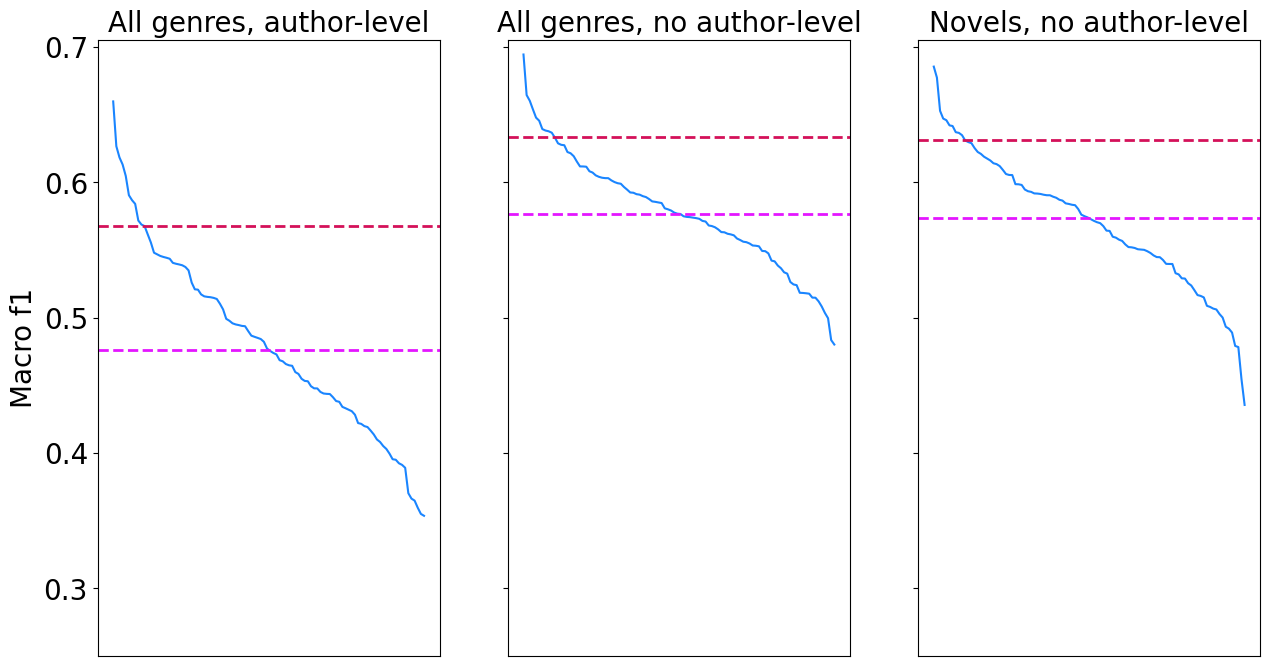

In [10]:
compareDataframesPlot([df_author, df_no_author, df_novels], ['All genres, author-level', 'All genres, no author-level', 'Novels, no author-level'], sniplen=100)

# Average placings of features

In [72]:
def findFeatPlacements(pair_lists, ind_feat_dict):
    #Function for getting all the placements of a particular feature
    returnable = {}
    for feat in ind_feat_dict:
        placements = []
        for i in range(len(pair_lists)):
            pair_lists[i].sort(key=lambda x: x[0])
            named_list = [feat_ind_dict[x[1]] for x in pair_lists[i]]
            placements.append(named_list.index(feat))
        returnable[feat] = int(np.median(np.array(placements)))
    return returnable

def plotFeaturePlacementAndF1(df):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    pair_lists_0_1 = []
    pair_lists_0_2 = []
    pair_lists_1_2 = []
    for i in range(100):
        pair_lists_0_1.append(df.iloc[i]['0 vs. 1'])
        pair_lists_0_2.append(df.iloc[i]['0 vs. 2'])
        pair_lists_1_2.append(df.iloc[i]['1 vs. 2'])
    custom_df = pd.DataFrame.from_dict([findFeatPlacements(pair_lists_0_1, ind_feat_dict), findFeatPlacements(pair_lists_0_2, ind_feat_dict), findFeatPlacements(pair_lists_1_2, ind_feat_dict)])
    custom_df.index=['7-8 vs. 9-12', '7-8 vs. 13+', '9-12 vs. 13+']
    custom_df = custom_df.transpose()
    return custom_df

def smallerThanN(its ,n, max):
    counter = 0
    for i in its:
        if i > n and i < (max-n):
            counter += 1
    return counter>2

In [12]:

#In the feats column
#Cases in Finnihs UD
CASES = ['Case=Nom', 'Case=Gen', 'Case=Par', 'Case=Ill', 'Case=Ine', 'Case=Ela', 'Case=Ade', 'Case=All', 'Case=Ess', 'Case=Abl', 'Case=Tra', 'Case=Acc', 'Case=Ins', 'Case=Abe', 'Case=Com']
#Verb forms in Finnish UD
VERBFORMS = ['VerbForm=Fin', 'VerbForm=Inf', 'VerbForm=Part']
#Verb tenses in Finnish UD
VERBTENSES = ['Tense=Pres', 'Tense=Past']
#Verb voices in Finnish UD
VERBVOICES = ['Voice=Act', 'Voice=Pass']
#Verb moods in Finnish UD
VERBMOODS = ['Mood=Ind', 'Mood=Cnd', 'Mood=Imp']
#Verb 'person' in Finnish UD (aka first person, second person and so on)
PERSONS = ['Person=0', 'Person=1', 'Person=2', 'Person=3']
#Verb 'number' in Finnish UD (aka first singluar person [me] or first plural person [we] and so on)
NUMBERS = ['Number=Sing', 'Number=Plur']
#Connegative (aka verb that has been given a negative meaning by 'ei')
CONNEGATIVE = ['Connegative=Yes']
#Degrees in Finnish UD (positive, comparative, and superlative)
DEGREES = ['Degree=Pos','Degree=Cmp','Degree=Sup']
#Syles in Finnish UD
STYLES = ['Style=Arch', 'Style=Coll']
#Reflex pronouns in Finnish UD
REFS = ['Reflex=Yes']
#PronTypes in Finnish UD
PRONTYPES = ['PronType=Dem', 'PronType=Ind', 'PronType=Int', 'PronType=Prs', 'PronType=Rcp', 'PronType=Rel']
#Verb polarity in Finnish UD
POLARITY = ['Polarity=Neg']
#Person possessor in Finnish UD (e.g. luu VS. luumme)
PPSORS = ['Person[psor]=1', 'Person[psor]=2', 'Person[psor]=3']
#Partforms in Finnish UD
PARTFORMS = ['PartForm=Agt', 'PartForm=Neg', 'PartForm=Past', 'PartForm=Pres']
#Number types in Finnish UD
NUMTYPES = ['NumType=Card', 'NumType=Ord']
#Numeral posessor in Finnish UD (e.g. aikani VS. aikanamme)
NPSORS = ['Number[psor]=Plur', 'Number[psor]=Sing']
#Infinitive forms for verbs in Finnish UD
INFFORMS = ['InfForm=1', 'InfForm=2', 'InfForm=3']
#Marks foreign words in Finnish UD
FOREIGN = ['Foreign=Yes']
#Derivations of words in Finnish UD
DERIVATIONS = ['Derivation=Inen', 'Derivation=Ja', 'Derivation=Lainen', 'Derivation=Llinen', 'Derivation=Tar', 'Derivation=Ton', 'Derivation=Ttain', 'Derivation=U', 'Derivation=Vs', 'Derivation=Inen|Vs' 'Derivation=Ja|Tar', 'Derivation=Lainen|Vs', 'Derivation=Llinen|Vs', 'Derivation=Ton|Vs']
#Clitics of words in Finnish UD
CLITICS = ['Cilitic=Han', 'Cilitic=Ka', 'Cilitic=Kaan', 'Cilitic=Kin', 'Cilitic=Ko', 'Cilitic=Pa', 'Cilitic=S', 'Cilitic=Han|Kin', 'Cilitic=Han|Ko', 'Cilitic=Han|Pa', 'Cilitic=Ko|S', 'Cilitic=Pa|S']
#AdpTypes in Finnish UD
ADPTYPES = ['AdpType=Post', 'AdpType=Prep']
#Marks if words are abbrevations in Finnish UD
ABBR = ['Abbr=Yes']

FEATS = CASES + VERBFORMS + VERBTENSES + VERBVOICES + VERBMOODS + PERSONS + NUMBERS + CONNEGATIVE + DEGREES + STYLES + REFS + PRONTYPES + POLARITY + PPSORS + PARTFORMS + NUMTYPES + NPSORS + INFFORMS + FOREIGN + DERIVATIONS + CLITICS + ADPTYPES + ABBR
#In the upos column

In [13]:
pprint(list(feat_ind_dict.values()))

['root',
 'nsubj',
 'advmod',
 'obl',
 'obj',
 'conj',
 'aux',
 'cc',
 'amod',
 'nmod:poss',
 'mark',
 'cop',
 'nsubj:cop',
 'advcl',
 'xcomp',
 'case',
 'det',
 'ccomp',
 'nmod',
 'parataxis',
 'acl:relcl',
 'acl',
 'xcomp:ds',
 'discourse',
 'nummod',
 'fixed',
 'cop:own',
 'appos',
 'flat:name',
 'compound:nn',
 'aux:pass',
 'vocative',
 'nmod:gobj',
 'nmod:gsubj',
 'compound:prt',
 'csubj:cop',
 'flat:foreign',
 'orphan',
 'cc:preconj',
 'csubj',
 'compound',
 'flat',
 'goeswith',
 'Case=Nom',
 'Case=Gen',
 'Case=Par',
 'Case=Ill',
 'Case=Ine',
 'Case=Ela',
 'Case=Ade',
 'Case=All',
 'Case=Ess',
 'Case=Abl',
 'Case=Tra',
 'Case=Acc',
 'Case=Ins',
 'Case=Abe',
 'Case=Com',
 'VerbForm=Fin',
 'VerbForm=Inf',
 'VerbForm=Part',
 'Tense=Pres',
 'Tense=Past',
 'Voice=Act',
 'Voice=Pass',
 'Mood=Ind',
 'Mood=Cnd',
 'Mood=Imp',
 'Person=0',
 'Person=1',
 'Person=2',
 'Person=3',
 'Number=Sing',
 'Number=Plur',
 'Connegative=Yes',
 'Degree=Pos',
 'Degree=Cmp',
 'Degree=Sup',
 'Style=Arch',
 

In [14]:
FEATS = [ 'Case=Nom',
 'Case=Gen',
 'Case=Par',
 'Case=Ill',
 'Case=Ine',
 'Case=Ela',
 'Case=Ade',
 'Case=All',
 'Case=Ess',
 'Case=Abl',
 'Case=Tra',
 'Case=Acc',
 'Case=Ins',
 'Case=Abe',
 'Case=Com',
 'VerbForm=Fin',
 'VerbForm=Inf',
 'VerbForm=Part',
 'Tense=Pres',
 'Tense=Past',
 'Voice=Act',
 'Voice=Pass',
 'Mood=Ind',
 'Mood=Cnd',
 'Mood=Imp',
 'Person=0',
 'Person=1',
 'Person=2',
 'Person=3',
 'Number=Sing',
 'Number=Plur',
 'Connegative=Yes',
 'Degree=Pos',
 'Degree=Cmp',
 'Degree=Sup',
 'Style=Arch',
 'Style=Coll',
 'Reflex=Yes',
 'PronType=Dem',
 'PronType=Ind',
 'PronType=Int',
 'PronType=Prs',
 'PronType=Rcp',
 'PronType=Rel',
 'Polarity=Neg',
 'Person[psor]=1',
 'Person[psor]=2',
 'Person[psor]=3',
 'PartForm=Agt',
 'PartForm=Neg',
 'PartForm=Past',
 'PartForm=Pres',
 'NumType=Card',
 'NumType=Ord',
 'Number[psor]=Plur',
 'Number[psor]=Sing',
 'InfForm=1',
 'InfForm=2',
 'InfForm=3',
 'Foreign=Yes',
 'Derivation=Inen',
 'Derivation=Ja',
 'Derivation=Lainen',
 'Derivation=Llinen',
 'Derivation=Tar',
 'Derivation=Ton',
 'Derivation=Ttain',
 'Derivation=U',
 'Derivation=Vs',
 'AdpType=Post',
 'AdpType=Prep',
 'Abbr=Yes']

In [15]:
#FEATS = list(feat_ind_dict.values())
POS = ['NOUN', 'VERB', 'PRON', 'ADV', 'AUX', 'ADJ', 'PROPN', 'CCONJ', 'SCONJ', 'ADP', 'NUM', 'INTJ', 'PUNCT']
DEPRELS = ['root', 'nsubj', 'advmod', 'obl', 'obj', 'conj', 'aux', 'cc', 'amod', 'nmod:poss', 'mark', 'cop', 'nsubj:cop', 'advcl', 'xcomp', 'case', 'det', 'ccomp', 'nmod', 'parataxis', 'acl:relcl', 'acl', 'xcomp:ds', 'discourse', 'nummod', 'fixed', 'cop:own', 'appos', 'flat:name', 'compound:nn', 'aux:pass', 'vocative', 'nmod:gobj', 'nmod:gsubj', 'compound:prt', 'csubj:cop', 'flat:foreign', 'orphan', 'cc:preconj', 'csubj', 'compound', 'flat', 'goeswith']


def customRule(x):
    
    if x.find('Variation') != -1 or x.find('Phrase') != -1:
        return False
    for p in POS:
        if x.find(p) != -1:
            return True
    return False

#FEATS = [x for x in FEATS if customRule(x)]
#print(FEATS)

start = 0
for i in range(2, len(FEATS), 2):
    row = FEATS[start:i]
    if len(row) < 2:
        row.append(" ")
    print(row[0]," &  & ",row[1]," & \\\\")
    start = i
row = FEATS[start:]
if len(row) == 1:
    row.append(" ")
print(row[0]," &  & ",row[1]," & \\\\")
print(len(FEATS))

Case=Nom  &  &  Case=Gen  & \\
Case=Par  &  &  Case=Ill  & \\
Case=Ine  &  &  Case=Ela  & \\
Case=Ade  &  &  Case=All  & \\
Case=Ess  &  &  Case=Abl  & \\
Case=Tra  &  &  Case=Acc  & \\
Case=Ins  &  &  Case=Abe  & \\
Case=Com  &  &  VerbForm=Fin  & \\
VerbForm=Inf  &  &  VerbForm=Part  & \\
Tense=Pres  &  &  Tense=Past  & \\
Voice=Act  &  &  Voice=Pass  & \\
Mood=Ind  &  &  Mood=Cnd  & \\
Mood=Imp  &  &  Person=0  & \\
Person=1  &  &  Person=2  & \\
Person=3  &  &  Number=Sing  & \\
Number=Plur  &  &  Connegative=Yes  & \\
Degree=Pos  &  &  Degree=Cmp  & \\
Degree=Sup  &  &  Style=Arch  & \\
Style=Coll  &  &  Reflex=Yes  & \\
PronType=Dem  &  &  PronType=Ind  & \\
PronType=Int  &  &  PronType=Prs  & \\
PronType=Rcp  &  &  PronType=Rel  & \\
Polarity=Neg  &  &  Person[psor]=1  & \\
Person[psor]=2  &  &  Person[psor]=3  & \\
PartForm=Agt  &  &  PartForm=Neg  & \\
PartForm=Past  &  &  PartForm=Pres  & \\
NumType=Card  &  &  NumType=Ord  & \\
Number[psor]=Plur  &  &  Number[psor]=Sing  & \

In [73]:
custom_df = plotFeaturePlacementAndF1(df_author)
N = 10
cmap = {
    'Younger':'r',
    'Older':'b',
    'NaN':'w'
}
custom_df = custom_df.drop([x for x in custom_df.index if smallerThanN(custom_df.loc[x].to_numpy(), N, len(custom_df))])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(custom_df)

                           7-8 vs. 9-12  7-8 vs. 13+  9-12 vs. 13+
nsubj                                52            9            11
obj                                  61          329           336
nmod:poss                           247          332           330
parataxis                            37            2             4
discourse                           336          327            59
compound:nn                           5            6            88
Tense=Pres                          333          330           249
Number=Plur                         133           24             6
Style=Coll                          336          337           309
PronType=Dem                          8            8           196
Derivation=Llinen                   308          330           307
Derivation=Vs                       196          332           332
Abbr=Yes                            335          324           268
NOUN_Phrase                           4            6          

In [130]:
def mapRanks(x):
    returnable = []
    for i in x:
        if i < N+1:
            returnable.append(x.name[:x.name.find('vs.')])
        elif i > (338-(N+1)):
            returnable.append(x.name[x.name.find('vs.')+3:])
        else:
            returnable.append(' ')
    return np.array(returnable)
custom_df = custom_df.sort_values(['7-8 vs. 13+', '9-12 vs. 13+'])
edit_custom_df = custom_df.apply(lambda x: mapRanks(x))
print(edit_custom_df)

                          7-8 vs. 9-12 7-8 vs. 13+ 9-12 vs. 13+
parataxis                                     7-8         9-12 
VERB_Phrase                       7-8         7-8         9-12 
TTR                                           7-8              
compound:nn                       7-8         7-8              
NOUN_Phrase                       7-8         7-8              
ADJ_To_PUNCT_Ratio                            7-8         9-12 
PronType=Dem                      7-8         7-8              
nsubj                                         7-8              
ADV_To_PUNCT_Ratio                            7-8         9-12 
PUNCT_To_VERB_Ratio                           7-8              
SCONJ_To_PUNCT_Ratio              7-8                          
PUNCT_Variation_Corrected         7-8                          
Number=Plur                                               9-12 
VERB_To_PUNCT_Ratio               7-8                          
PRON_To_ADV_Ratio                 9-12  

<Axes: >

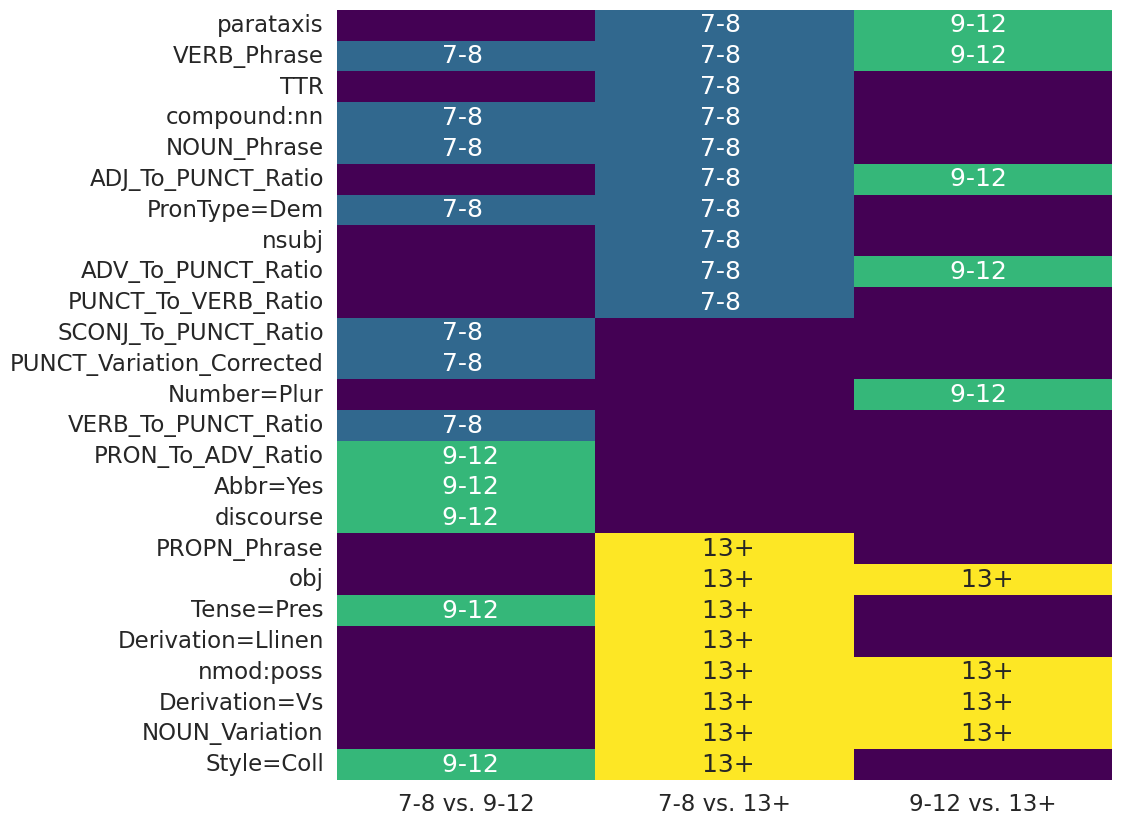

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
def mapVals(x):
    returnable = []
    for i in x:
        if i < N+1:
            if x.name[:x.name.find('vs.')] == '7-8 ':
                returnable.append(1)
            else:
                returnable.append(2)
        elif i > (338-(N+1)):
            if x.name[x.name.find('vs.')+3:] == ' 9-12':
                returnable.append(2)
            else:
                returnable.append(3)
        else:
            returnable.append(0)
    return np.array(returnable)

plt.figure(figsize=(10, 10))
sns.set_theme(font_scale=1.5)
sns.heatmap(custom_df.apply(lambda x: mapVals(x)), annot=edit_custom_df.to_numpy(), fmt='', cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))

## Correlations between feature weights and f1

In [11]:
#Function for calculating the correlation coefficients for if features being present at certain positions affects f1

def correlationF1Features(df, feat_column):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    columns = list(ind_feat_dict.keys())
    inds_f1 = df.sort_values('keylist_id')['f1'].to_numpy().tolist()
    pair_lists = [y for y in [y for y in df.sort_values('keylist_id')[feat_column].to_numpy()]]
    binary_matrix = np.zeros((100,338))
    for i in range(len(pair_lists)):
        named_list = [feat_ind_dict[x[1]] for x in pair_lists[i]]
        weights_list = [x[0] for x in pair_lists[i]]
        for j in range(len(columns)):
            feat = columns[j]
            binary_matrix[i][j] = weights_list[named_list.index(feat)]
            #ind = feat in named_list
            #if ind:
            #    binary_matrix[i][j] = 1
            #else:
            #    binary_matrix[i][j] = 0



    f1_bookid_df = pd.DataFrame(binary_matrix, index=inds_f1, columns=columns)

    def getBinaryCorrMatrix(df):
        Y = df.index.to_numpy()
        coeffs = []
        for c in df.columns:
            X = df[c].to_numpy()
            coeffs.append(stats.pearsonr(X, Y))
        return pd.DataFrame(coeffs, index=df.columns)

    returnable = getBinaryCorrMatrix(f1_bookid_df)
    return returnable
    #Only care about ones with p<0.05
    #return returnable[(returnable['pvalue'] < 0.05) & (abs(returnable['statistic']) > 0.2)].sort_values('statistic')

In [12]:
print(df_author.columns)

Index(['sniplen', 'keylist_id', 'f1', 'labels', 'conf_matrix',
       'bookid_prediction', '0 vs. 1', '0 vs. 2', '1 vs. 2'],
      dtype='object')


In [13]:
#For the 2nd paper, select only the features that are Medium+ in KFA

KFA_med = ['NestingOfClauses', 'SCONJ_To_ADV_Ratio', 'Derivation=Ton', 'PRON_Variation', 'PROPN_To_SCONJ_Ratio', 'ADJ_Variation_Corrected', 'Person[psor]=1', 'ccomp', 'TTR', 'ADV_To_SCONJ_Ratio', 'SCONJ_Variation_Corrected', 'Reflex=Yes', 'ADV_Variation', 'INTJ_To_SCONJ_Ratio', 'Number[psor]=Sing', 'VERB_Variation', 'StackingOfClauses', 'NOUN_Variation_Corrected', 'ADV_To_AUX_Ratio']


In [28]:
#7-8 vs. 9-12
corr_df_0_1 = correlationF1Features(df_author, '0 vs. 1')
#Filter to KFA med features
#corr_df_0_1 = corr_df_0_1[corr_df_0_1.index.isin(KFA_med)]
corr_0_1_masked = corr_df_0_1.apply(lambda x: True if (x['pvalue']<0.05 and abs(x['statistic']) >= 0.2) else False, axis=1)
#7-8 vs. 13+
corr_df_0_2 = correlationF1Features(df_author, '0 vs. 2')
#Filter to KFA med features
#corr_df_0_2 = corr_df_0_2[corr_df_0_2.index.isin(KFA_med)]
corr_0_2_masked = corr_df_0_2.apply(lambda x: True if (x['pvalue']<0.05 and abs(x['statistic']) >= 0.2) else False, axis=1)
#9-12 vs. 13+
corr_df_1_2 = correlationF1Features(df_author, '1 vs. 2')
#Filter to KFA med features
#corr_df_1_2 = corr_df_1_2[corr_df_1_2.index.isin(KFA_med)]
corr_1_2_masked = corr_df_1_2.apply(lambda x: True if (x['pvalue']<0.05 and abs(x['statistic']) >= 0.2) else False, axis=1)

/tmp/ipykernel_12195/513880163.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


In [29]:
print(corr_0_1_masked[corr_0_1_masked].index)
print(corr_0_2_masked[corr_0_2_masked].index)
print(corr_1_2_masked[corr_1_2_masked].index)

Index(['mark', 'xcomp', 'discourse', 'flat:name', 'flat:foreign', 'Case=Par',
       'VerbForm=Part', 'Style=Arch', 'PartForm=Past', 'Foreign=Yes',
       'Derivation=Ton', 'Derivation=Ttain', 'NOUN', 'VERB',
       'VERB_Variation_Corrected', 'VERB_To_CCONJ_Ratio',
       'VERB_To_PUNCT_Ratio', 'PRON_To_ADP_Ratio', 'PRON_To_PUNCT_Ratio',
       'ADV_Variation', 'ADV_To_AUX_Ratio', 'ADV_To_ADP_Ratio',
       'ADV_To_NUM_Ratio', 'AUX_To_ADJ_Ratio', 'AUX_To_ADP_Ratio',
       'ADJ_Phrase', 'ADJ_To_INTJ_Ratio', 'PROPN_Variation',
       'PROPN_To_CCONJ_Ratio', 'CCONJ_Phrase', 'CCONJ_To_INTJ_Ratio',
       'ADP_Phrase', 'ADP_To_AUX_Ratio', 'NUM_Phrase', 'INTJ_Phrase',
       'INTJ_To_ADJ_Ratio', 'INTJ_To_CCONJ_Ratio', 'PUNCT',
       'PUNCT_To_PRON_Ratio', 'AvgSylPerSent', 'F-K-GradeLevel'],
      dtype='object')
Index(['nsubj', 'advmod', 'obl', 'mark', 'xcomp', 'fixed', 'Case=Nom',
       'Case=Gen', 'Case=Ine', 'Case=Tra', 'VerbForm=Part', 'Tense=Past',
       'Voice=Act', 'Mood=Ind', 'M

In [30]:
#Only True valued features
added_df  = pd.DataFrame({'7-8 vs. 9-12':corr_df_0_1[corr_df_0_1.index.isin(corr_0_1_masked[corr_0_1_masked].index)]['statistic'], '7-8 vs. 13+':corr_df_0_2[corr_df_0_2.index.isin(corr_0_2_masked[corr_0_2_masked].index)]['statistic'], '9-12 vs. 13+':corr_df_1_2[corr_df_1_2.index.isin(corr_1_2_masked[corr_1_2_masked].index)]['statistic']})

In [31]:
#KFA med features
#added_df  = pd.DataFrame({'7-8 vs. 9-12':corr_0_1_masked, '7-8 vs. 13+':corr_0_2_masked, '9-12 vs. 13+':corr_1_2_masked})

In [32]:
print(added_df)
print(len(added_df))

                   7-8 vs. 9-12  7-8 vs. 13+  9-12 vs. 13+
ADJ_Phrase            -0.244634          NaN           NaN
ADJ_To_ADP_Ratio            NaN    -0.207236           NaN
ADJ_To_ADV_Ratio            NaN          NaN      0.204631
ADJ_To_INTJ_Ratio     -0.239560          NaN           NaN
ADJ_To_VERB_Ratio           NaN     0.206051           NaN
...                         ...          ...           ...
nsubj                       NaN    -0.238927           NaN
nsubj:cop                   NaN          NaN     -0.266035
nummod                      NaN          NaN     -0.305108
obl                         NaN     0.209781           NaN
xcomp                  0.239850     0.218254           NaN

[132 rows x 3 columns]
132


In [33]:
bool_added_df = added_df.copy()
for c in bool_added_df.columns:
    bool_added_df[c] = bool_added_df[c].apply(lambda x: True if abs(x)>=0 else False)

<Axes: >

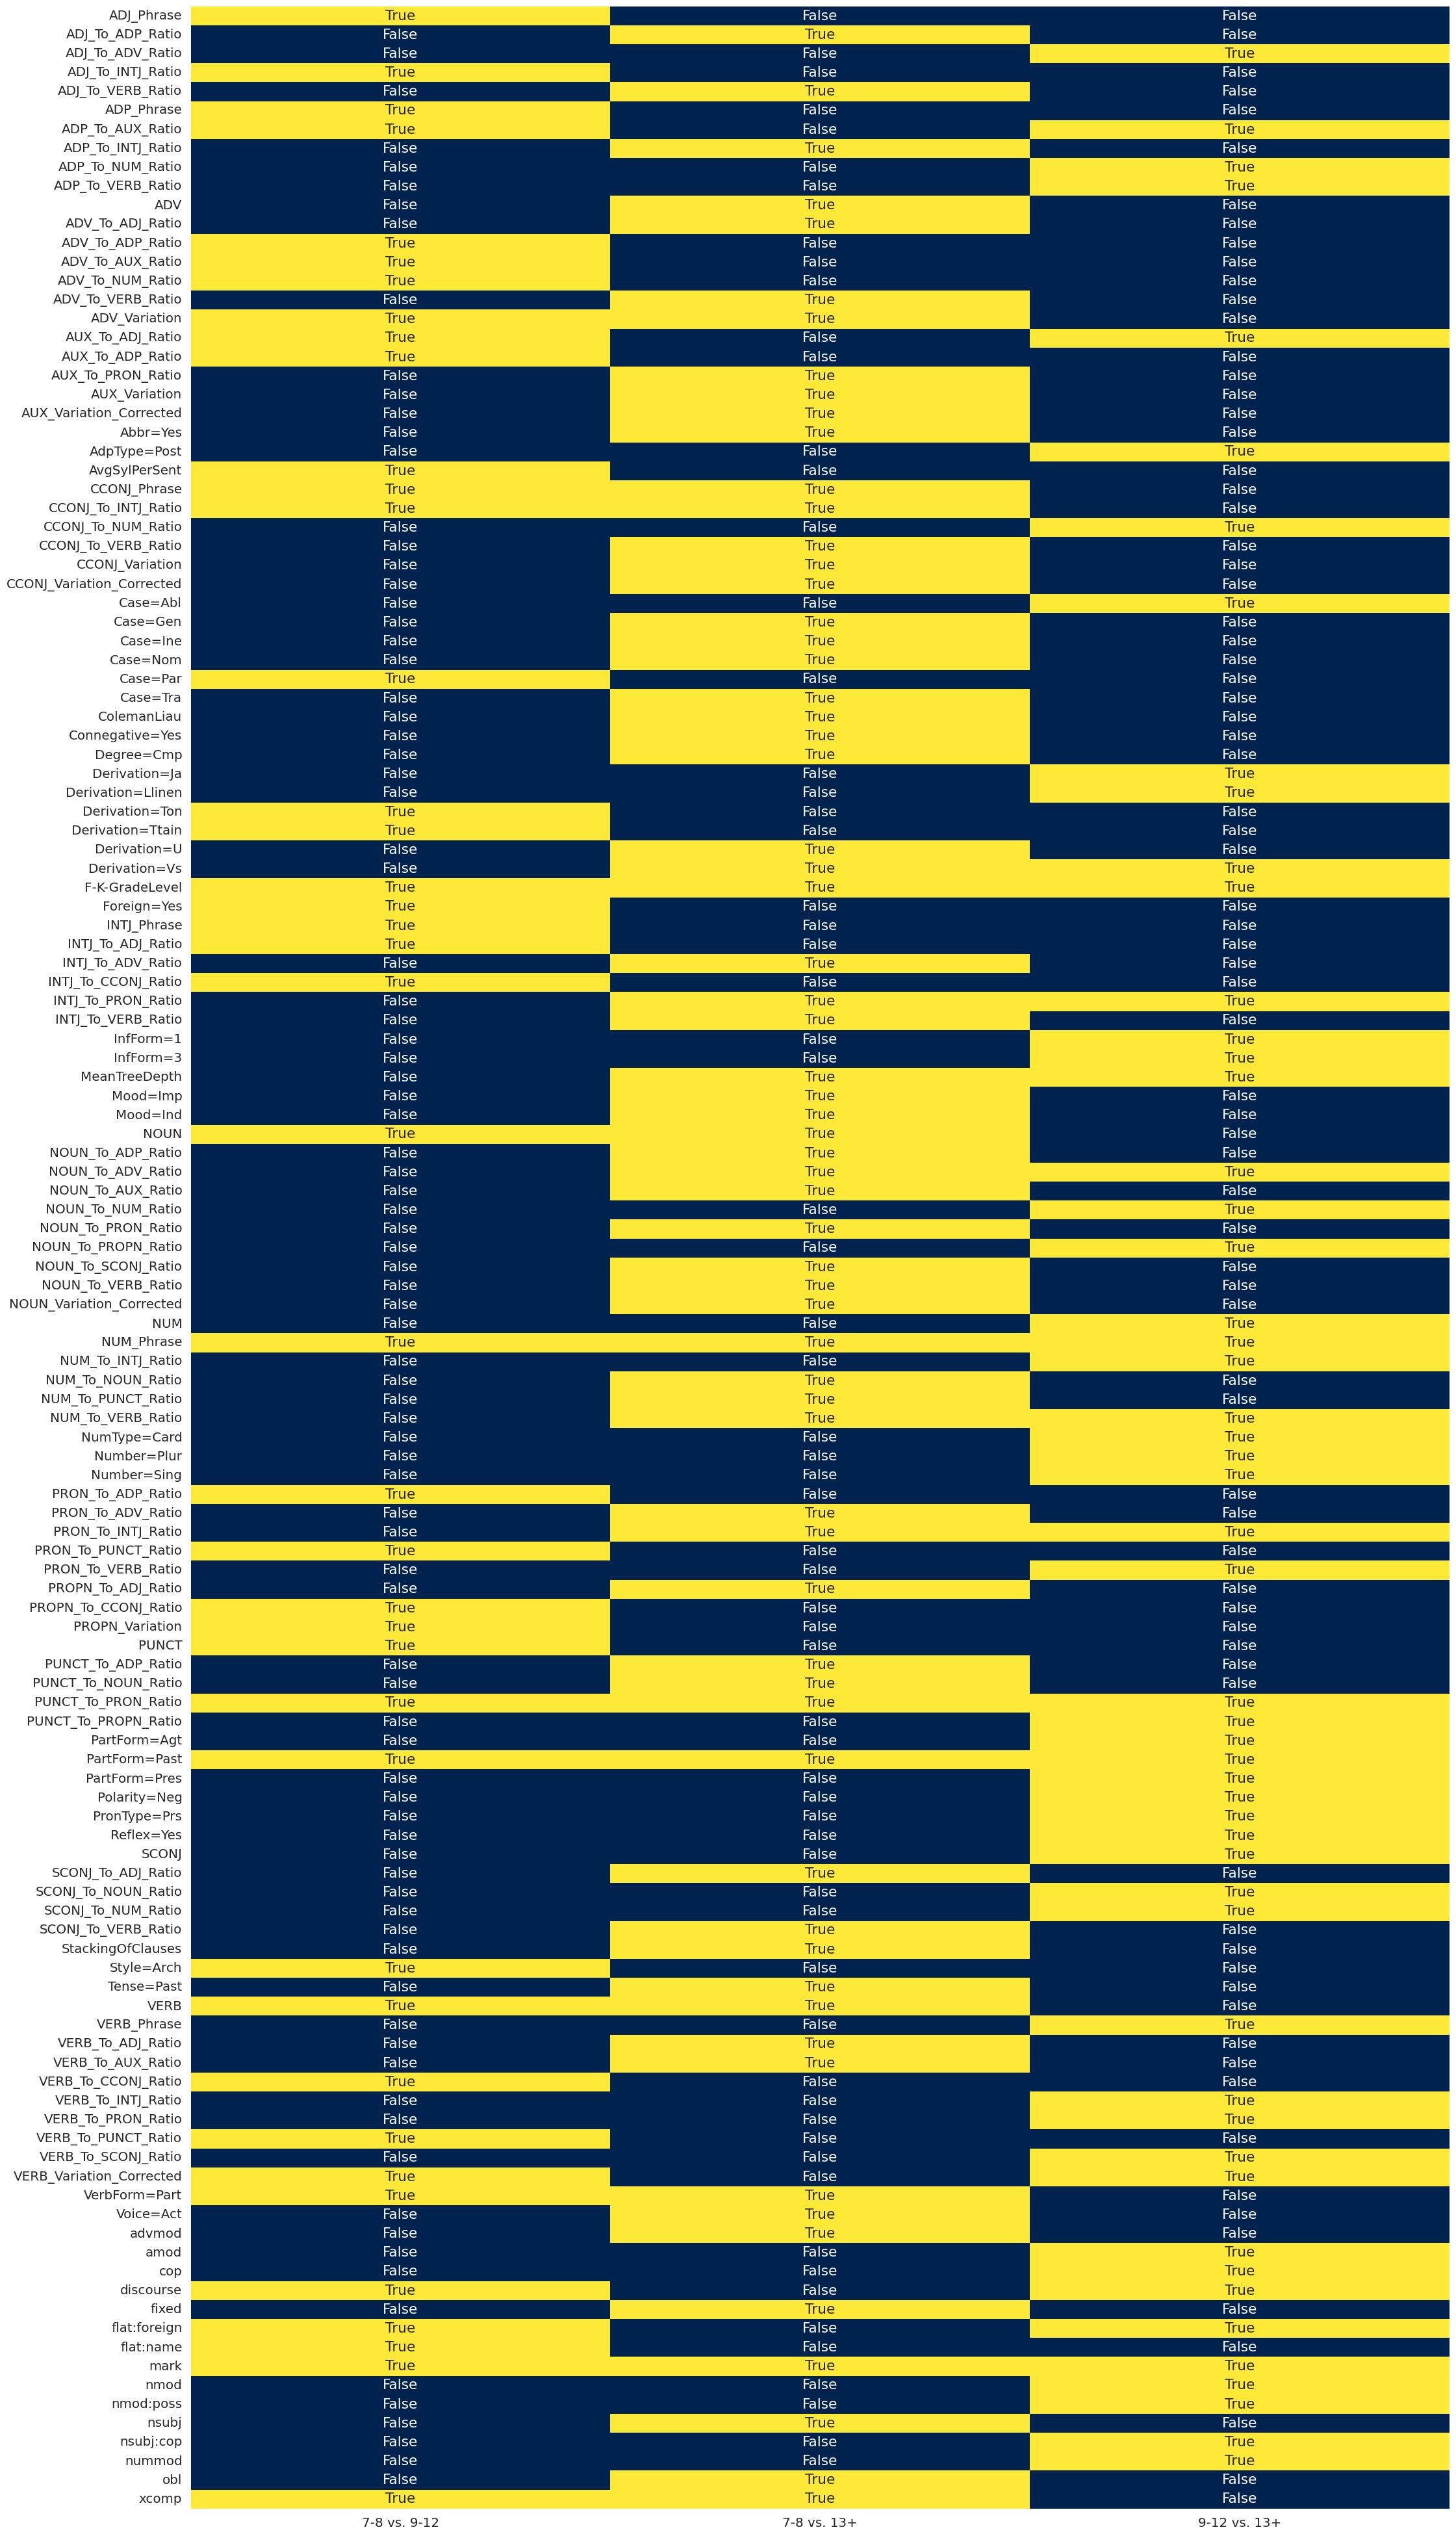

In [43]:
import seaborn as sns
plt.figure(figsize=(25, 50))
sns.set_theme(font_scale=1.3)
sns.heatmap(bool_added_df, cmap='cividis', yticklabels=bool_added_df.index.to_numpy().tolist(), annot=bool_added_df.to_numpy(), fmt = '', vmin=0, vmax=1, cbar=False)

In [35]:
def findFeatPlacements(pair_lists, feat, significant=True):
    #Function for getting all the placements of a particular feature
    returnable = []
    for i in range(len(pair_lists)):
        named_list = [feat_ind_dict[x[1]] for x in pair_lists[i]]
        weights_list = [x[0] for x in pair_lists[i]]
        if significant:
            returnable.append(weights_list[named_list.index(feat)])
        else:
            returnable.append(np.nan)
    return returnable

def plotFeaturePlacementAndF1(df, feat, includeAll = False):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    inds_f1 = df.sort_values('f1', ascending=False)['f1'].to_numpy().tolist()
    pair_lists_0_1 = []
    pair_lists_0_2 = []
    pair_lists_1_2 = []
    inds_f1 = []
    df=df.sort_values('f1')
    for i in range(100):
        inds_f1.append(df.iloc[i]['f1'])
        pair_lists_0_1.append(df.iloc[i]['0 vs. 1'])
        pair_lists_0_2.append(df.iloc[i]['0 vs. 2'])
        pair_lists_1_2.append(df.iloc[i]['1 vs. 2'])
    if includeAll:
        f1_bookid_df = pd.DataFrame({'7-8 vs. 9-12':findFeatPlacements(pair_lists_0_1, feat), '7-8 vs. 13+':findFeatPlacements(pair_lists_0_2, feat), '9-12 vs. 13+':findFeatPlacements(pair_lists_1_2, feat)}, index=inds_f1)
    else:
        f1_bookid_df = pd.DataFrame({'7-8 vs. 9-12':findFeatPlacements(pair_lists_0_1, feat, corr_0_1_masked.loc[feat]), '7-8 vs. 13+':findFeatPlacements(pair_lists_0_2, feat, corr_0_2_masked.loc[feat]), '9-12 vs. 13+':findFeatPlacements(pair_lists_1_2, feat, corr_1_2_masked.loc[feat])}, index=inds_f1)
    fig, ax = plt.subplots()
    #fig.set_size_inches(15, 8)
    for c in f1_bookid_df.columns:
        x = f1_bookid_df[c].to_numpy()
        if not np.isnan(x).all():
            y= f1_bookid_df.index.to_numpy()
            plt.scatter(x=x, y=y, label=c, alpha=0.3)
            # fitting a linear regression line
            m, b = np.polyfit(x, y, 1)
            # adding the regression line to the scatter plot
            plt.plot(x, m*x + b)
        


    ax.legend()
    ax.set_ylim(0.3,0.7)
    #ax.set_xlim(-2, 2)
    ax.set_ylabel("Macro f1")
    ax.set_xlabel("Feature weight for StackingOfClauses")
    plt.show()



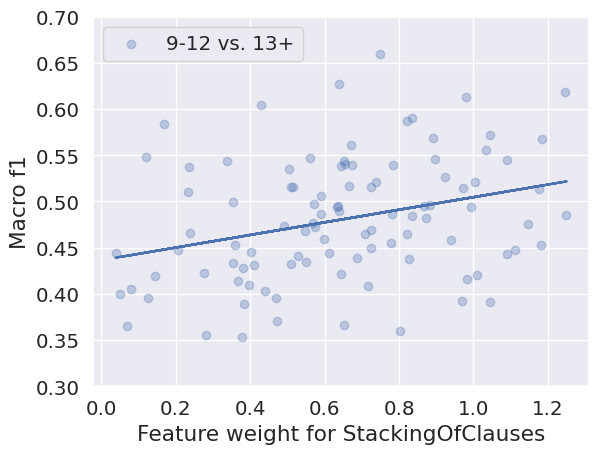

In [36]:
df_author = pd.DataFrame.from_dict(loaded_covoc_hpfv_author)
df_author['sniplen'] = df_author['sniplen'].apply(lambda x: int(x))
plotFeaturePlacementAndF1(df_author, 'Reflex=Yes')

## Correlations between feature amounts in the split vs f1 score

In [37]:
#Creating keylist metadata...
from datasets import Dataset

split_sizes = []

test_df = df_author

def getSplitsDSInfo(feat):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    train_1 = []
    train_2 = []
    train_3 = []
    eval_1 = []
    eval_2 = []
    eval_3 = []
    test_1 = []
    test_2 = []
    test_3 = []

    for split in range(100):
        d = {}
        #Nab keys
        train_keys = keylists[split]['train_keys']
        eval_keys = keylists[split]['eval_keys']
        test_keys = keylists[split]['test_keys']
        #Load base dataset. Use 100 cause, well, that's what we decided :)
        base_dataset = Dataset.load_from_disk("TCBC_datasets/sniplen100_hpfv")
        #Training dataset
        train_ds = base_dataset.filter(lambda x: x['book_id'] in train_keys)
        train_1.append(np.mean(train_ds.filter(lambda x: x['label'] == '7-8')['data'], axis=0)[ind_feat_dict[feat]])
        train_2.append(np.mean(train_ds.filter(lambda x: x['label'] == '9-12')['data'], axis=0)[ind_feat_dict[feat]])
        train_3.append(np.mean(train_ds.filter(lambda x: x['label'] == '13+')['data'], axis=0)[ind_feat_dict[feat]])
        #Evaluation dataset
        eval_ds = base_dataset.filter(lambda x: x['book_id'] in eval_keys)
        eval_1.append(np.mean(eval_ds.filter(lambda x: x['label'] == '7-8')['data'], axis=0)[ind_feat_dict[feat]])
        eval_2.append(np.mean(eval_ds.filter(lambda x: x['label'] == '9-12')['data'], axis=0)[ind_feat_dict[feat]])
        eval_3.append(np.mean(eval_ds.filter(lambda x: x['label'] == '13+')['data'], axis=0)[ind_feat_dict[feat]])
        #Test dataset
        test_ds = base_dataset.filter(lambda x: x['book_id'] in test_keys)
        test_1.append(np.mean(test_ds.filter(lambda x: x['label'] == '7-8')['data'], axis=0)[ind_feat_dict[feat]])
        test_2.append(np.mean(test_ds.filter(lambda x: x['label'] == '9-12')['data'], axis=0)[ind_feat_dict[feat]])
        test_3.append(np.mean(test_ds.filter(lambda x: x['label'] == '13+')['data'], axis=0)[ind_feat_dict[feat]])

    #return pd.DataFrame({'f1':test_df.sort_values('keylist_id')['f1'].to_numpy(), 'train_13+':train_3, 'eval_13+':eval_3, 'test_13+':test_3})
    return pd.DataFrame({'f1':test_df.sort_values('keylist_id')['f1'].to_numpy(), 'train_7-8':train_1, 'train_9-12':train_2, 'train_13+':train_3, 'eval_7-8':eval_1, 'eval_9-12':eval_2, 'eval_13+':eval_3, 'test_7-8':test_1, 'test_9-12':test_2, 'test_13+':test_3})

In [38]:

#feat_splits_df_93 = getSplitsDSInfo('PartForm=Past')
#feat_splits_df_336 = getSplitsDSInfo('StackingOfClauses')
#feat_splits_df_31 = getSplitsDSInfo('vocative')


In [39]:
#feat_splits_df_NVC = getSplitsDSInfo('NOUN_Variation_Corrected')

In [40]:
#feat_splits_df_REF = getSplitsDSInfo('Reflex=Yes')

In [41]:
feat_splits_df_336.index = list(range(100))
#tg_df.index = tg_df['f1'].to_numpy().tolist()
def drawings(df):
    fig, ax = plt.subplots()
    #fig.set_size_inches(15, 8)
    for c in df.columns[1:]:
        x = df[c].to_numpy()
        y= df['f1'].to_numpy()
        plt.scatter(x=x, y=y, label=c, alpha=0.25)
        # fitting a linear regression line
        m, b = np.polyfit(x, y, 1)
        # adding the regression line to the scatter plot
        plt.plot(x, m*x + b)
    ax.legend()
    ax.set_ylim(0.3,0.7)
    #ax.set_xlim(0, .3)
    ax.set_ylabel("Macro f1")
    ax.set_xlabel("Mean StackingOfClauses per sentence")

drawings(feat_splits_df_93)

NameError: name 'feat_splits_df_336' is not defined